# <div style=" text-align: center; font-weight: bold">Phase 03: Exploratory data analysis</div>


## **1. Import necessary Python modules**

In [168]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder


## **2. Ask meaningful questions**
### **2.1 Read the data from file**
First, read the clean data that we cleaned before to a dataframe.

In [169]:
real_estate_for_sale_df = pd.read_csv('../Data/cleaned_real_estate_for_sale.csv', encoding='utf-8')
real_estate_for_sale_df.head()

,Type,Area(m2),Price(VNĐ),Bedroom(Phòng),Toilet(Phòng),Floor(Tầng),Furniture,Legal,Posting date,District,Project
0,Căn hộ chung cư,161.08,1.798000e+10,3.0,3.0,3.0,Nội thất đầy đủ,Sổ đỏ và sổ hồng,2023-12-06,1,Dự án Zenity
1,Căn hộ chung cư,116.00,9.800000e+09,3.0,2.0,3.0,Nội thất đầy đủ,Sổ đỏ và sổ hồng,2023-12-03,1,Dự án Zenity
2,Căn hộ chung cư,77.00,6.000000e+09,2.0,2.0,3.0,Nội thất đầy đủ,Sổ đỏ và sổ hồng,2023-12-01,1,Dự án Zenity
3,Căn hộ chung cư,76.00,6.200000e+09,2.0,2.0,3.0,Nội thất đầy đủ,Hợp đồng mua bán,2023-12-05,2,Dự án Lumiere Riverside
4,Căn hộ chung cư,95.00,7.600000e+09,2.0,2.0,3.0,Nội thất đầy đủ,Sổ đỏ và sổ hồng,2023-12-07,1,Dự án Zenity


### **2.2 Question 01: How the numbers of real estate is distributed by the district in Ho Chi Minh City? Which district have the most real estate? Which type of real estate is the signature for each district?**
As a buyer, when we have need to find a real estate, we want to choose the best real esate that fit most with our requirement. But before that, we should know about the current status of real estate market for the district we intend to find. By answering this question, we will know get more knowledge about the current distribution of each real estate type across district.

First, let's extract the column `Type` and `District` of dataframe.

In [170]:
real_estate_by_district_df = real_estate_for_sale_df[['Type', 'District']]

#### **1.1 Number of real estates in each district**
Now, we will see how the real estate is distributed by the district. We will use bar chart to show the number of real estates are currently in a district.

In [171]:
district_count = real_estate_by_district_df['District'].value_counts().reset_index()

In [172]:

district_count.sort_values(ascending = False ,by='count', inplace= True)
mean_of_count = np.mean(district_count['count'])
fig = px.bar(district_count,
              x='count',
              y='District', orientation='h', color='count',
             color_continuous_scale='viridis_r', title='<b>Total amount of real estate by districts </b>',
             labels={'count': '<b>Count</b>', 'District': '<b>District</b>'})

fig.update_layout(
               title_font_size = 30,
               width = 1000,
               height = 700,
               margin=dict(l=20, r=30, t=70, b=20),
               paper_bgcolor='#ffe6cc',
               xaxis=dict(tickfont=dict(size=16)),
               yaxis=dict(tickfont=dict(size=16), ticksuffix = "  ")
               )
fig.update_traces(marker_line_color='black', marker_line_width=1.0, hovertemplate='<b>%{x}</b> real estates are located in <b>district %{y}</b>')
fig.show(config=dict({'scrollZoom':False}))

Through the plot, we can see that there is an uneven distribution of real estate for sale in Ho Chi Minh City, while most of them are located in `District 7`, `District 2`, `District 9`, `Bình Thạnh`. Also, `District 7` have the highest number with nearly 4500 properties. This indicates that I we want to get more selection of real estate, these districts are potential locations.

#### **1.2 Distribution of real estates' types in each district**
Now, let's see which is the signature type for each district.     
For this, we will find the percentage of each type of real estate that located at a district

In [173]:
district_type_df = real_estate_for_sale_df[['Type', 'District']]
# Group by and find the count of each type in each district.
district_type_df = district_type_df.groupby('District')['Type'].value_counts().reset_index(name = 'Count')

district_type_df.loc[:, 'Percentage'] = (district_type_df.loc[:,'Count'] / district_type_df.groupby('District')['Count'].transform('sum'))*100
district_type_df.loc[:, 'Percentage'] = district_type_df.loc[:, 'Percentage'].round(2)



Now for each district, we will draw a pie chart to show the percentage of each real estate type in the district.

In [174]:
fig = px.pie(
            district_type_df,
            names ='Type',
            values = 'Percentage',
            color = 'Type',
            labels={ 'District': '<b>Quận</b>'},
            facet_col='District',
            facet_col_wrap = 4,
            facet_col_spacing=0.04,
            facet_row_spacing= 0.04, 
            color_discrete_map= {
                                'Nhà mặt phố': '#78D6C6',
                                'Nhà riêng' : '#F5FCCD',
                                'Căn hộ chung cư': '#4ba775',
                                'Nhà biệt thự, liền kề' : '#17526e',
                                'Đất bán': '#088395',
                                'Đất nền dự án': '#071952'
                                }
            )

fig.update_layout(
    width=1100, height=1500,
    margin=dict(l=20, r=20, t=90, b=20),
    paper_bgcolor='#ffe6cc',
    title='<b>Percentage Distribution of Real Estate Types by District</b>',
    title_font_size=25,
)
fig.update_traces(
    marker_line_color='black', marker_line_width=0.5, hovertemplate='<b>%{label}</b> has the percentage of <b>%{value}%</b>',textposition='inside', insidetextorientation='radial')

fig.show()


Which the percentage of the real estate type in each district, we get some observation about the distribution of real estate type in each district below:

- `District 1` : The majority of real estate consists of `Nhà riêng`(40.1%), `Nhà mặt phố` also make up a significant portion as well (33.92%), followed by `Căn hộ chung cư`(25.37%%).

- `District 10` : In district 10, the two most significant types are `Nhà riêng` and `Nhà mặt phố`. `Nhà riêng` represents 53.37%, while `Nhà mặt phố` accounts for 25.89%%.

- `District 11`: Similar to `District 10`, the major types in `district 11` are `Nhà riêng`( 53.41%) and `Nhà mặt phố` (31.1%)

- `District 12`: The most prominent real estate types are `Nhà riêng`(41%) and `Đất bán`(24.7%). `Nhà mặt phố` and `Căn hộ chung cư` are also popular options.

- `District 2`: District 2 is characterized by the high percentage of `Căn hộ chung cư`(up to 60.9%). `Nhà mặt phố`, `Đất bán`, `Nhà biệt thự, liền kề` also have a notable percentage in this district (around 8%).

- `District 3`: In district 3, two types that we can get more concern are `Nhà mặt phố`(60%) and ` Nhà riêng`(29.6%).

- `District 4`: In District 4, the majority of real estate are `Căn hộ chung cư`(68%), followed by `Nhà riêng`(26.1%).

- `District 5`: In District 5, two major types of real estate are `Nhà riêng`(46.3%) and `Nhà mặt phố`(35.5%) 

- `District 6`: The majority of real estate is `Căn hộ chung cư`(45.8%), `Nhà mặt phố` also make up a significant proportion at 29.7%, followed by `Nhà riêng` with 22.6%.

- `District 7`: In District 7, the majority of real estate consist of `Căn hộ chung cư`(53.5%),`Nhà riêng` (18.37%).

- `District 8`: In District 8, the major types are `Căn hộ chung cư`(44.3%), `Nhà riêng`(33.2%), followed by `Nhà mặt phố`(11%).

- `District 9`: In District 9, there is an equal percentage for each type, with `Căn hộ chung cư`(30.4%), `Nhà biệt thự, liền kề`(17%) are the notable types.

- `Bình Chánh District`: The highest percentage is `Căn hộ chung cư` (29.9%) , followed by `Đất bán`(26.7%), `Nhà riêng` (12.9%) and `Đất nền dự án` (11.12%).

- `Bình Thạnh District`: In Bình Thạnh, `Nhà riêng` (49.7%) is the most significant real estat type, followed by `Căn hộ chung cư`(23%) and `Nhà mặt phố`(18.4%)

- `Bình Tân District `: In Bình Tân, `Nhà riêng`(44.9%), `Căn hộ chung cư`(24.9%) have the highest percentage.

- `Cần Giờ District `:In Cần Giờ, the majority of real estate is `Đất bán` (77.2%), while the other types contribute a very small percentage.

- `Củ Chi District`: Similar to `Cần Giờ`, the majority is also `Đất bán`, accounting for 87.3% of the total.

- `Gò Vấp District`: In Gò Vấp, the majority of real estate are `Nhà riêng` (63.3%), `Nhà mặt phố` (18.7%).

- `Hóc Môn District`: In Hóc Môn, the prominent real estate types are `Đất bán` (48.6%) and `Nhà riêng` (33.8%).

- `Nhà Bè District`: In Nhà Bè, there is a equaly distribution for all types, with the largest portion consists of `Căn hộ chung cư` (26.5%)

- `Phú Nhuận District`: In Phú Nhuận, the majority are `Nhà riêng` (58.2%), `Nhà mặt phố` (25.5%).

- `Thủ Đức District`: In Thủ Đức, the largest portion of real estate consists of `Nhà riêng` (33.7%), `Đất bán` (23.7)%, `Căn hộ chung cư` (15.34%), and `Nhà mặt phố` (17.7%).

- `Tân Bình District`: In Tân Bình, `Nhà riêng` (56.2%), `Nhà mặt phố` (27.43%) are two most significant types of the real estate.

- `Tân Phú District `: In Tân Phú, `Căn hộ chung cư` (38.1%), `Nhà riêng` (34.6%) and `Nhà mặt phố` (24%) are types with highest percentage.

These are all the real estate types that is most significant for each district. We can see that, by the different of development conditions, the geographical position, and other factor, the significant types of real estate for sale in each district are also have differences.


**Overall:**

Let's make an overall view in this question again:

For **the number of real estate in each district**, we can see `District 7` and `District 2` are two district with highest number of real estate (4415 for `District 7` and 3999 for `District 2`), followed by `District 9` and `Bình Thạnh District`

For **the signature type of real estate of each district**, we can have the conclusion below:

- Districts which have the signature type is `Nhà riêng`:`District 1` ,`District 10`, `District 11`, `District 12`,`District 3`, `District 5`, `Bình Thạnh District`, `Bình Tân District`, `Gò Vấp District`, `Phú Nhuận District`, `Tân Bình District`, with over 50% percent.

- Disticts have the signature type is `Căn hộ chung cư`: `District 2`, `District 4`, `District 6`, `District 7`, `District 8`, `District 9`, `Bình Chánh District`, `Nhà Bè District`, `Tân Phú District`.

- Districts have the signature type is `Nhà mặt phố`: `Nhà mặt phố` have an important percentage in  `District 1`, `District 11`, `District 3`, `District 5`, `District 6`, `Phú Nhuận District`, `Tân Bình District`, `Tân Phú District`

- Districts have the signature type is `Đất bán`: `Cần Giờ District`, `Củ Chi District`, `Hóc Môn District`. 

- All other types just have a little percentage in each district. This indicates that the demand to sell these types of real estate are not very high, also not very popular in Ho Chi Minh City.

### **2.3 Question 02: Which each type of real estate, how is the price distributed across districts? Based on this informaton, give the comment about which district will have a resonable (cheaper) price compared to others for each type of real estate?**

When searching for real estate as a buyer, in addition to quantity, price is also a crucial factor. A potential property is one that is located in a good location and has a favorable price. This question will provide an overview of the price situation for each type of real estate across all districts, which can be easily applied when searching for a specific type of property.

#### **2.3.1 The overall price for each types of real estate.**
First, let's see the overall price of each type to get a overall view about the current price state of each real estate type.

In [175]:
price_by_type_df = real_estate_for_sale_df.copy().groupby('Type')['Price(VNĐ)'].agg('mean').reset_index()
price_by_type_df = price_by_type_df.sort_values(by=['Price(VNĐ)'], ascending=[False])

In [176]:
fig = px.bar(price_by_type_df ,
                x = 'Price(VNĐ)', 
                y = 'Type',
                text='Price(VNĐ)',
                labels={'Price(VNĐ)': '<b>Price(VNĐ)</b>', 'Type': '<b>Type</b>'},
                color='Price(VNĐ)',
                color_continuous_scale='Blues'
                )

fig.update_layout(
    title_text= f'<b>The average price of each real estate type </b>',
    title_font_size=15,
    width=1000,
    height= 400,
    margin=dict(l=20, r=30, t=70, b=0),
    paper_bgcolor='#ffe6cc',
    xaxis=dict(tickfont=dict(size=14)),
    yaxis=dict(tickfont=dict(size=14), ticksuffix = " "),
)
fig.update_traces(marker_line_color='black', marker_line_width=1, hovertemplate='The average price of <b>%{y}</b> is %{x}')

fig.show()

We can see that , among all type, the average price of `Căn hộ chung cư` is the least, while the average price of `Nhà mặt phố` and `Nhà biệt thự, liền kề` are the highest, nearly much more than `Căn hộ chung cư` three times.

#### **2.3.2 The price distriution for each types across districts.**
Now, we will make a deeper analysis for the price of each type, how are its price distributed across districts.

In [177]:
types = real_estate_for_sale_df['Type'].unique()

# Create a dictionary to store the data about all the district that have the current real estate type
type_and_most_occur_district = {}

for type in types:
     df = district_type_df[(district_type_df['Type'] == type ) & (district_type_df['Percentage'] >0)]
     type_and_most_occur_district[type] = df['District'].to_list()


In [178]:
type_and_district_dict = {}

for type, districts in type_and_most_occur_district.items():
    
    df = real_estate_for_sale_df[(real_estate_for_sale_df['Type'] == type) & (real_estate_for_sale_df['District'].isin(districts))].dropna()

    type_and_district_dict[type] = df

We can see the `Price` have many difference values, so we will divide them in to bins. Now, let's define the bins (the range of each bins is refer from the original website)

In [179]:
price_bins = {
    '< 1 billion' : (0, 1000000000),
    '1 billion - 5 billion' : (1000000000, 5000000000),
    '5 billion - 10 billion' : (5000000000, 10000000000),
    '10 billion - 30 billion' : (10000000000, 30000000000),
    '> 30 billion' : (30000000000, float(np.inf)),  
}

In [180]:
# Funtion to set the new range
def map_price_range(price):
    for label, (lower, upper) in price_bins.items():
        if lower <= price < upper:
            return label
    return None

In [181]:
# Apply function to convert the price into the range.
for type, value  in type_and_district_dict.items():
    modified_df = value.copy()

    modified_df['Price Range'] = modified_df['Price(VNĐ)'].apply(map_price_range)

    modified_df = modified_df[['District', 'Price(VNĐ)', 'Price Range']]

    type_and_district_dict[type] = modified_df


In [182]:
# Find the count and percentage for all the income range of each types
for type, value in type_and_district_dict.items():
    value = value.groupby('District')['Price Range'].value_counts().reset_index(name = 'Count')
    value.loc[:,'Percentage'] = ((value['Count'] / value.groupby('District')['Count'].transform('sum'))*100)
    value['Percentage'] = value['Percentage'].round(2)
    value = value.sort_values(by=['District','Percentage'], ascending=[True, False])
    type_and_district_dict[type] = value

I use the function below to present the income distribution by percentage for each data type. The plot will be stacked bar chart, with each column represnt for the `District`, then in each column, the distribution of price range will be shown.

In [183]:
def Price_distribution_of_type(type):
    value = type_and_district_dict[type]
    fig = px.bar(value ,
                x = 'District', 
                y = 'Count',
                color='Price Range',
                text='Percentage',
                labels={'Percentage': '<b>Percentage</b>', 'Price Range': '<b>Price Range</b>', 'Count': '<b>Count</b>', 'District': '<b>District</b>'},
                category_orders={'Price Range':  ['< 1 billion', '1 billion - 5 billion', '5 billion - 10 billion', '10 billion - 30 billion','> 30 billon'],},
                barmode='stack',
                )

    fig.update_layout(
        title_text= f'<b>Price distribution of {type} by district</b>',
        title_font_size=15,
        width=1100,
        height= 650,
        margin=dict(l=20, r=30, t=70, b=0),
        paper_bgcolor='#ffe6cc',
        xaxis=dict(tickfont=dict(size=14)),
        yaxis=dict(tickfont=dict(size=14), ticksuffix = " "),
    )

    fig.update_layout(legend=dict(
    orientation="h", yanchor="bottom", y=1, xanchor="right", x = 1))
    fig.update_traces(marker_line_color='black', marker_line_width=1, hovertemplate='<b>%{text}</b> (%) of '+f'<b>{type}</b>'+ ' in %{x} have price in range <b>%{fullData.name}</b>')

    fig.show()


In [184]:
def mean_price_by_district(type):
    
    price_by_district_df = real_estate_for_sale_df[real_estate_for_sale_df['Type'] == type].groupby('District')['Price(VNĐ)'].agg('mean').reset_index()
    price_by_district_df = price_by_district_df.sort_values(by=['Price(VNĐ)'], ascending=[True])
    price_by_district_df['Price(VNĐ)'] = price_by_district_df['Price(VNĐ)'].round(2)
    
    fig = px.bar(price_by_district_df,
                y = 'Price(VNĐ)', 
                x = 'District',
                text='Price(VNĐ)',
                labels={'Price(VNĐ)': '<b>Price(VNĐ)</b>', 'Type': '<b>Type</b>', 'District': '<b>District<b>'},
                color='Price(VNĐ)',
                color_continuous_scale='Blues'
                )
    fig.update_layout(
        title_text= f'<b>The average price of {type} by district </b>',
        title_font_size=15,
        width=1000,
        height= 400,
        margin=dict(l=20, r=30, t=70, b=20),
        paper_bgcolor='#ffe6cc',
        xaxis=dict(tickfont=dict(size=14)),
        yaxis=dict(tickfont=dict(size=14), ticksuffix = " "),
    )
    fig.update_traces(marker_line_color='black', marker_line_width=1, hovertemplate='The average price of '+ f'<b>{type}</b>' + ' in district <b>%{x}</b> is %{y}')

    fig.show()

In this question, to find out the most potential location of each type of real estate. We will consider three factors:
- The average total price of the type in the district: Give us an overview of the price for this real estate type in each district
- The total amount of the real estate type currently located in the district: To see the current market of this type in each district.
- The distribution of price range of type in the district: show the difference between each price range in the district.

I think that, a suitable location is the one which have a balance ratio between these factors, So for each type, our priority is compare these factors of districts each other to get a meaningful conclusion about the best location for each type.

##### **Type Nhà riêng:**

In [185]:
mean_price_by_district('Nhà riêng')

Currently, we can easily see that with the average price that `<5 billion`: `Củ Chi`, `Bình Chánh`, `Hóc Môn`, `District 12` and `Cần Giờ` can be consider as the cheapest district in `Nhà riêng`, also with the average upto over `15 billion` , `District 1` is place with the most expensive `Nhà riêng`. For a detail view, let's consider each range of price

In [186]:
Price_distribution_of_type('Nhà riêng')

With type `Nhà riêng`, as we dicuss in `Question 01`, mainly concentrate in `Bình Thạnh`, `Gò Vấp`, `Tân Bình`, for a detail view, let's go through each price range:
- `< 1 billion`: While there just a small number of `Nhà riêng` in `Bình Chánh`(just nearly 200), but the ratio of `< 1 billion` is much more than other districs, followed by  `District 12` with percentage is 2.04% of `Nhà riêng`

- `1 billion - 5 billion`: with this range of price, we can easily observe that `Củ Chi` is the highest (86.21%), followed by `District 12` (64.9%). Others like `Bình Tân` and `Gò Vấp`, while the percentage of is lower, the count is not differnect too much. So if you have more concern about `Nhà riêng` in this price range, these district will be potential options.

- For the range from `5 billion - 10 billion` and `10 billion - 30 billion`, for the whole districts(except for `District 12`), the price concentrates in these ranges. This indicates that these are common price for `Nhà riêng` in `Ho Chi Minh City`

- The last range `>30 billion`, this is such a very high price that not many districts have `Nhà riêng` in this price. This range mainly concentrate in `Tân Bình`, `Bình Thạnh`, `Phú Nhuận`, `Distric 1`, `Distric 2`.

**Conclusion:**

In conclusion, we can see that there are a various of price distribution of `Nhà riêng` for each district in `Ho Chi Minh City`, but totally:

- As we consider above `Củ Chi`, `Bình Chánh`, `Hóc Môn`, `District 12` are all the cheap districts, but look at the number of `Nhà riêng` of them, `Nhà riêng` is not popular `Củ Chi`, `Bình Chánh`, `Hóc Môn`. So by the limited of choice, they can't be a good option. Beside that we can easily observe that `District 12` have a good balance between the price and the various range of choice, so the conclusion here, `District 12` will be the best choice for  to find a `Nhà riêng` which have cheaper price.

- `Bình Thạnh`, `Gò Vấp`, `Tân Bình`, beside the high number of `Nhà riêng`, the average price is also in an medium range, plus a various price range, so they will be good choice for every types of customers.
- For those want to find a more expensive price, beside these district above, `Distric 1`, `District 2` and `Distric 3` are also notable options.


##### **Type Căn hộ chung cư:**

In [187]:
mean_price_by_district('Căn hộ chung cư')

`Hóc Môn` have the cheapest average price, most of district have the average range that below `6 billion`, seem common price of `Căn hộ chung cư` can be cheaper than `Nhà riêng`. But among them, there is a significant difference of the average price in `District 1`, almost double all other districts.

In [188]:
Price_distribution_of_type('Căn hộ chung cư')

As we discuss above, there is a simmiliarty of the price for most of district, while most of the price concerntrate in the range that `< 5 billion`, we can conclude that this is the common price for `Căn hộ chung cư` in `Ho Chi Minh City`

- `< 5 billion`:Unlike the others, a notable district here is `District 1`, with just 12.02% `Căn hộ chung cư` have the price in this range. So the conclusion here is it will me so diffcult to find a cheap apartemnt in `District 1`. 

Some districts that have the balance percentage of `< 5 billion` with other ranges are `District 2`, `District 7`, `District 10`, `District 4`, `Bình Thạnh`, `Phú Nhuận`. This mean these district have the balance distributon of price.
- `> 5 billion`: Highly concerntrate in `District 1` , also have more in `District 2`, `District7`, `Bình Thạnh`. This is the reason why the average price in these district is higher than other districts, especially `District 1` .

**Conclusion:**
- In overall, we can easilly found that most of `Căn hộ chung cư` will have cheaper price than `Nhà riêng`, and we can easily find a cheap apartment in `Ho Chi Minh City`
- In contrast, `District 1`, among just a little number of apartment here, but the price is so high. So we can see that `District 1` is not a suitable place to find a cheep apartment, with the avarage price go up to `12 billion`.
- Beside that, `District 2`, with the highest amount of `Căn hộ chung cư`, the price is also various, also is the distict that contain most of appartments which have highest price, with the average price just behind `District 1`. So we can indicate that `District 2` may contain many appartments that is much more luxury or high-end than other districts. With that, `District 2` can be an interesting place to find suitable apartment.

##### **Type Nhà mặt phố:**

In [189]:
mean_price_by_district('Nhà mặt phố')

We can see there is a large distance between the lowest and highest average price (up to `20 billion`) and the average price mostly concetrate in range over `10 billion`, and `District 1`, continue be the district that have the highest average price. Now go further for a better view.

In [190]:
Price_distribution_of_type('Nhà mặt phố')

With `Nhà mặt phố`, we can see that the overall price is considerably high, mostly concerntrate in ranges `10 million - 30 billion` and `> 30 million`. We can easily explain the reason by the nature of `Nhà mặt phố` type. These are the real estates that located in mostly located in major streets. These locations provide various advantages, such as convenient transportation, business areas, and more other advantage for medical or education. Due to these favorable attributes, the prices of `Nhà mặt phố` properties tend to be significantly higher compared to other types of real estate in Ho Chi Minh City.

Because of that, `Nhà mặt phố` is not a potential type for someone who want to find a house with low budget, but we can get more chance to find a cheap one in `Bình Chánh`, `District 12`, `Hóc Môn` or `Bình Tân`, which have the price in the lower range, also the amount of options is not very bad.


##### **Type Nhà biệt thự, liền kề:**

In [191]:
mean_price_by_district('Nhà biệt thự, liền kề')

`Nhà biệt thự, liền kề` share the same trend with `Nhà mặt phố`, with the highest average price go up to over `30 billion` in `District 10`, and most of them have the price above `20 billion`.

In [192]:
Price_distribution_of_type('Nhà biệt thự, liền kề')

- In the case of `Nhà biệt thự, liền kề`, most of price fall within a high price range, typically `> 5 billion`. This type are considered as high-level, luxury real estate options just for some specific individuals or families seeking premium housing. The elevated prices of these property types have the strong correlation with their exclusivity, unique features. So this is not suprise for the super high price in this type.
- There still about 20% of `Nhà biệt thự, liền kề` in `District 12` have the price `<5 billion`, but it just take a little in the amount.
- But for the choices, we can consider `District 9`, which both have a various selections (over 500) and a good average price (nearly `15 billion`).

##### **Type Đất bán:**

In [193]:
mean_price_by_district('Đất bán')

The average price is in many difference range, with lowest price is `Củ Chi`, ans highest is in `District 3`

In [194]:
Price_distribution_of_type('Đất bán')

With `Đất bán`, the price distribution are various among districts, but we can divide them in three groups: Low-price district, medium-price district  and High-price district.
- `Low-price district`: In general, the price that `< 5 billion` mostly concerntrate in `District 12`, `Bình Chánh`, `Bình Tân`, `Củ Chi`, `Hóc Môn`, `Nhà Bè`. These districts are suitable to find a cheaper land for sale. Among them, account for 98% of price in this range, `Củ Chi` is the district have the cheapest price.
- `Medium-price district`: These district will have the distribution much more equaly for all price range, and not skew to any side. These are `District 9`, `Thủ Đức`. Go along the high amount of land for sale, there also many options of price so it's more easy to find a suitable one with our demand. So they all so will be potential options to find a land for sale.
- `High-price district`: in these district, the price is much more higher, from `5 billion` and can be `>30 billion`, they are `District 2`, `District 3`, `Bình Thạnh`, `District 7`, `Gò Vấp`, `Tân Bình`, `Tân Phú`, `District 1`.

##### **Type Đất nền dự án:**

In [195]:
mean_price_by_district('Đất nền dự án')

The price here is divided into three clear range, `Củ Chi`, `Hóc Môn`, `Cần Giờ` that `<5 billion`. Also `Bình Thạnh`, `District 7`, `District 2` in range `> 10 billion`, and the rest, in the range `5 billion - 10 billion`

In [196]:
Price_distribution_of_type('Đất nền dự án')

We can see that `Đất nền dự án` are not as popular as other type of real estate, there just some notable districts : `District 9`, `District 2`, `District 7`, `Bình Chánh`, `Nhà Bè`.

- Among them `District 2`, `District 7` have the highest price in total, with most of percentage in range `5 billion to over 30 billion`
- Beside that, `Nhà Bè` can be considered as the cheapest district in `Đất nền dự án`


**Conclusion:**
Overall, there is differences between the price's distribution for each type of real estate:

- While there are more diffrences of price among districts in `Nhà riêng`, `Căn hộ chung cư` and `Đất bán`, the others types share the same trend in the `Price`. The reason here is the total number of `Nhà riêng` and `Căn hộ chung cư` sample that we collected is much more than other types, and account for most of samples in the dataset. Because of that, there will be a wider range of the features and attributes that can be found in the dataset. As a result, the price distribution within these types shows greater variability and abundance of options among different districts.
- Look through all the types, we can find some districts which have prominent price (cheaper or higher) than others:
    - `District 12`: With the super high percentage of low price for `Nhà riêng`, `Căn hộ chung cư`, `Đất bán`, also have low overall price in expensive types like `Nhà mặt phố`, `Nhà biệt thự liền kề` and `Đất nền dự án`. This is the most suitable district to have a good property with low income.
    - `District 1`: The price here, for all types, are always in a higher range than most of other district, especially in `Nhà riêng` and `Nhà mặt phố`. 
    - `District 2` and `District 7`: the price is distruted quite equaly in all ranges, go along with the large amount of selections, so can be suitable for all level of buyers.

### **2.4 Question 03: Which factors will affect to the the price of each real estate type, which is the relationship between the price and other factors?**

Now, we will take a look about the relationship of price of each real estate type with other columns. Here, we want to know more about fators that could affect the price of a real estate. This information will be necessary for both buyers and sellers:
- Sellers: Having a clear understanding of the relationship between these factors helps sellers determine an appropriate price for their property, avoiding the scenario of setting a price that is too high or too low compared to the actual value of the property
- Buyers: Understanding these factors also help a smoother price negotiation process with the seller. Also buyers can easily imagine all the attribute of the real estate that fit with their current budget.

Before go into the analysis, in the price column have many price is `Thỏa thuận`. In this analysis, we just consider the real estate that have speccific price. Therefore, we will extract all the price which is not `Thỏa thuận` first.

In [197]:
real_estate_price = real_estate_for_sale_df.copy()

Now, let's group the `real_estate_price` by the type, then extract the each type to a new dataframe.

In [198]:
real_estate_price['Type'].value_counts()

Type
Nhà riêng                15232
Căn hộ chung cư          12928
Nhà mặt phố               7314
Đất bán                   4476
Nhà biệt thự, liền kề     2188
Đất nền dự án             1698
Name: count, dtype: int64


Now, let's consider the correlation between each factor to the price.
- To get the correlation between columns in the dataframe, we will use the correlation matrix. But before that we have to normalize the dataframe.:
    - With numerical column, we can use it directly
    - But with categorical columns like `Furniture`, `Legal`, `District`, we have to convert them into numerical datatype.

First, for each type of real estate, create a new dataframe for each type.

In [199]:
unique_types = ['Nhà riêng', 'Nhà mặt phố', 'Căn hộ chung cư', 'Nhà biệt thự, liền kề', 'Đất bán', 'Đất nền dự án']
real_estate_df_by_type = {}

for house_type in unique_types:

    current_type_df = real_estate_price[real_estate_price['Type'] == house_type].copy().reset_index()
    current_type_df = current_type_df.drop(columns=['index'])
    
    real_estate_df_by_type[house_type] = current_type_df


Now, for each type, let's see some statistical values of them. 

As we discuss before, the type `Đất bán`, `Đất nền dự án` will not have the column `Bedroom(Phòng)`, `Toilet(Phòng)`, `Floor(Tầng)`, `Furniture`, so let's drop them first

In [200]:
real_estate_df_by_type['Đất bán'].drop(columns = ['Bedroom(Phòng)', 'Toilet(Phòng)', 'Floor(Tầng)', 'Furniture'], inplace = True)
real_estate_df_by_type['Đất nền dự án'].drop(columns = ['Bedroom(Phòng)', 'Toilet(Phòng)', 'Floor(Tầng)', 'Furniture'], inplace = True)

real_estate_df_by_type['Nhà riêng']['Legal'].value_counts()

Legal
Sổ đỏ và sổ hồng      10528
Không có thông tin     3604
Sổ hồng                 857
Khác                    100
Hợp đồng mua bán         78
Sổ đỏ                    50
Đang chờ sổ              15
Name: count, dtype: int64

Okay, now with each type, let's convert the categorical column to numerical column. I will use `Scikit learn` library for this convert

Here, in this step the district is just a nominal column, so we will consider it later.

In [201]:
ordinal_encoder = OrdinalEncoder()

columns_to_encode1 = ['Furniture', 'Legal']
columns_to_encode2 = ['Legal']

# Set the other for each level of furniture and legal
furniture_order = ['Không có thông tin', 'Khác', 'Không nội thất', 'Nội thất cơ bản', 'Nội thất đầy đủ', 'Nội thất sang trọng']
legal_order = ['Không có thông tin', 'Khác', 'Đang chờ sổ', 'Hợp đồng mua bán', 'Sổ hồng', 'Sổ đỏ', 'Sổ đỏ và sổ hồng']

ordinal_encoder.categories_ = [None, furniture_order, legal_order]

# Perform the ordinal encoding.
for house_type, df in real_estate_df_by_type.items():
    if house_type in ('Đất bán', 'Đất nền dự án'):
        for column in columns_to_encode2:
            encoded_column = ordinal_encoder.fit_transform(df[[column]])
            df[column] = encoded_column
    else:
        for column in columns_to_encode1:
            encoded_column = ordinal_encoder.fit_transform(df[[column]])
            df[column] = encoded_column
    real_estate_df_by_type[house_type] = df


Now, we can find the correlation between each factor for each type of real estate. We will use heat map to visualize the result.

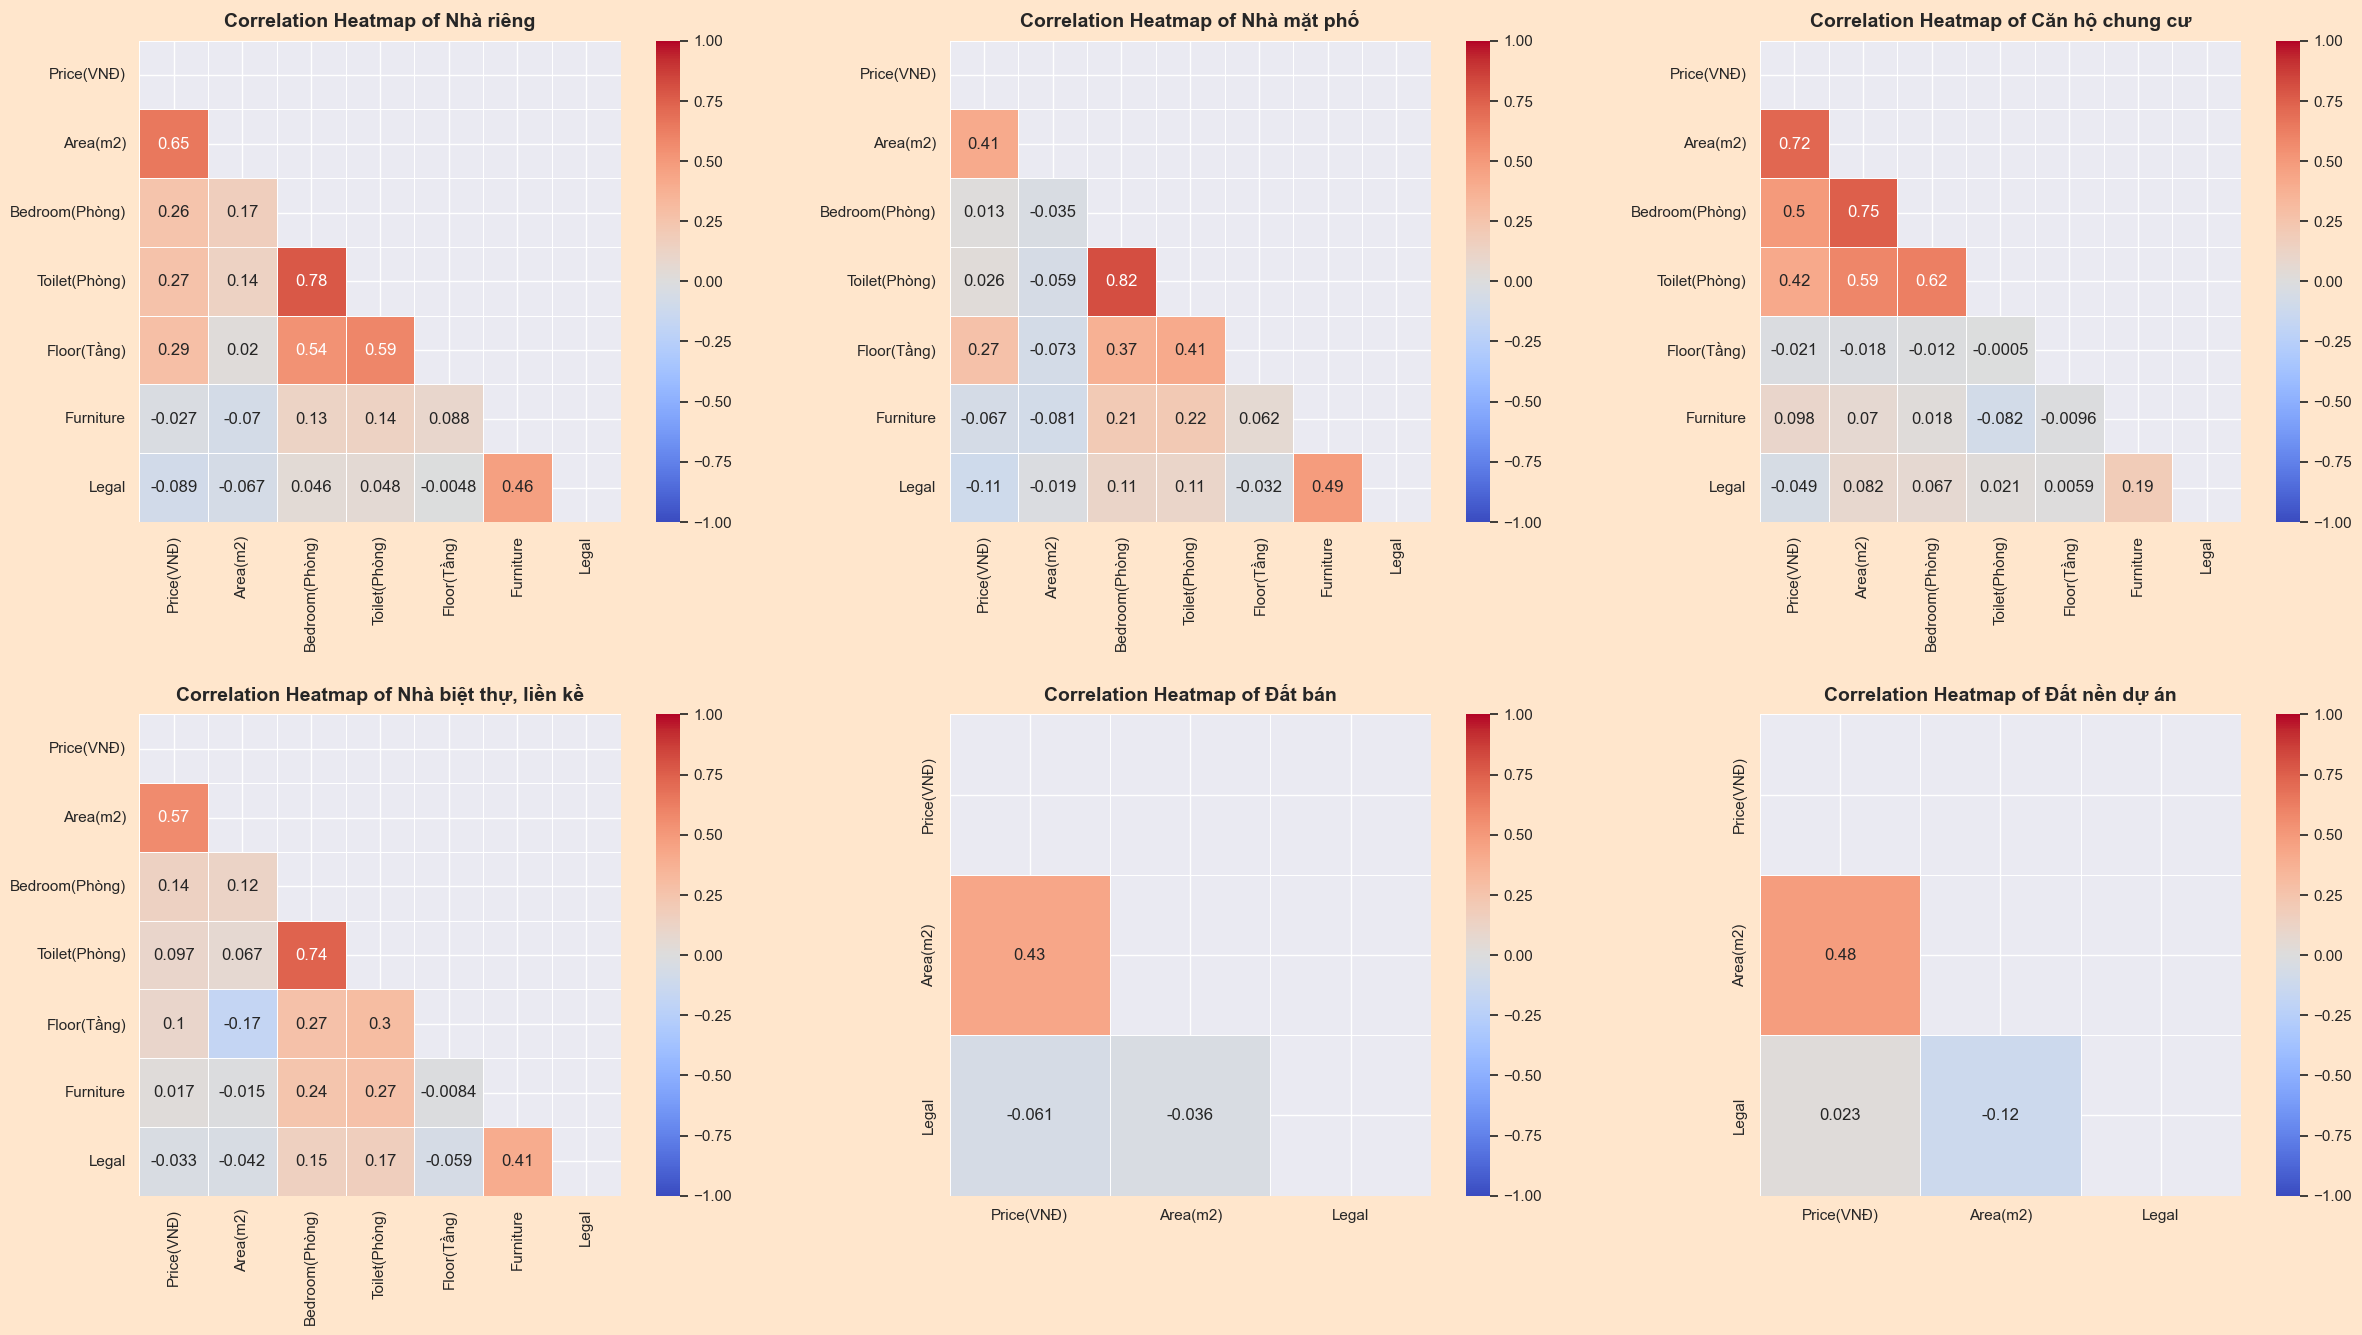

In [202]:
columns_to_correlate1 = ['Price(VNĐ)', 'Area(m2)', 'Bedroom(Phòng)', 'Toilet(Phòng)', 'Floor(Tầng)','Furniture', 'Legal']
columns_to_correlate2 = ['Price(VNĐ)', 'Area(m2)', 'Legal']
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(30, 15))
sns.set()
i = 0

for type in real_estate_df_by_type:
    if type in ('Đất bán', 'Đất nền dự án'):
        correlation_matrix = real_estate_df_by_type[type][columns_to_correlate2].corr()
    else:
        correlation_matrix = real_estate_df_by_type[type][columns_to_correlate1].corr()
    ax = axes[i//3, i%3]
    
    mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', square=True, linewidth=.5, vmin=-1, vmax=1, ax= ax, mask= mask)
    ax.set_title(f'Correlation Heatmap of {type}', fontsize = '14', fontweight = 'bold', pad = 10)
    i += 1

plt.subplots_adjust(wspace=0.15, hspace=0.4)
fig = plt.gcf()
fig.set_facecolor('#ffe6cc')
plt.show()

By these heat map, we can see that: 

- With type `Nhà riêng`, `Căn hộ chung cư`:

    - The correlation is quite similar, with a strong correlation between the `Price` with `Area`, `Bedroom`,` Toilet`. That indicates that the these factors is the important criterian for a person to determine the price of the real estate.

    - The difference here is the `Floor`, while there is a high correlation with `Price` of `Nhà riêng`, the correlation in `Căn hộ chung cư` is quite low. The reason here is that the meaning of `Floor` in `Chung cư` have the different meaning with other. The floor here is the floor that this apartment located, not number of floor like other types.

    - There is the low correlation between the `Price` with `Legal`, `Furniture`. It means `Legal`, `Furniture` are not affect the `Price` much.

- Beside that, with `Nhà mặt phố`, just show that the correlation between `Price` with other factors is not very high. Some notable factors are `Area` and `Floor`, with 0.47 for `Area` and 0.27 for `Floor`.

- With `Đất bán ` and `Đất nền dự án`, both of them have the strong correlation between the `Price` with `Area`, negative correlation between `Price` and `District`


Okay, now let's see how the price of each type is related to each district.
In question 2, we can see that which each type of real estate are different price distribution in each district. So, the hypothesis here is the district have a big contribution to the price of real estate, now, let's confirm it.

In [203]:
real_estate_df_by_type_district = {}
for type in real_estate_df_by_type:
    df = real_estate_df_by_type[type]['District']
    df = pd.get_dummies(df, columns=['District'])
    df = pd.concat([real_estate_df_by_type[type]['Price(VNĐ)'], df], axis=1)
    real_estate_df_by_type_district[type] = df

In [204]:
def corraltion_price_district(type):
    df = real_estate_df_by_type_district[type]
    corr_matrix = df.corr()
    fig = plt.figure(figsize=(25,8))
    mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidth=.5,  vmin=-1, vmax=1, mask= mask)
    plt.title(f'Correlation Heatmap between Price and District of {type}', fontsize = '14', fontweight = 'bold', pad = 10)
    fig = plt.gcf()
    fig.set_facecolor('#ffe6cc')
    plt.show()

##### **Type Nhà riêng**

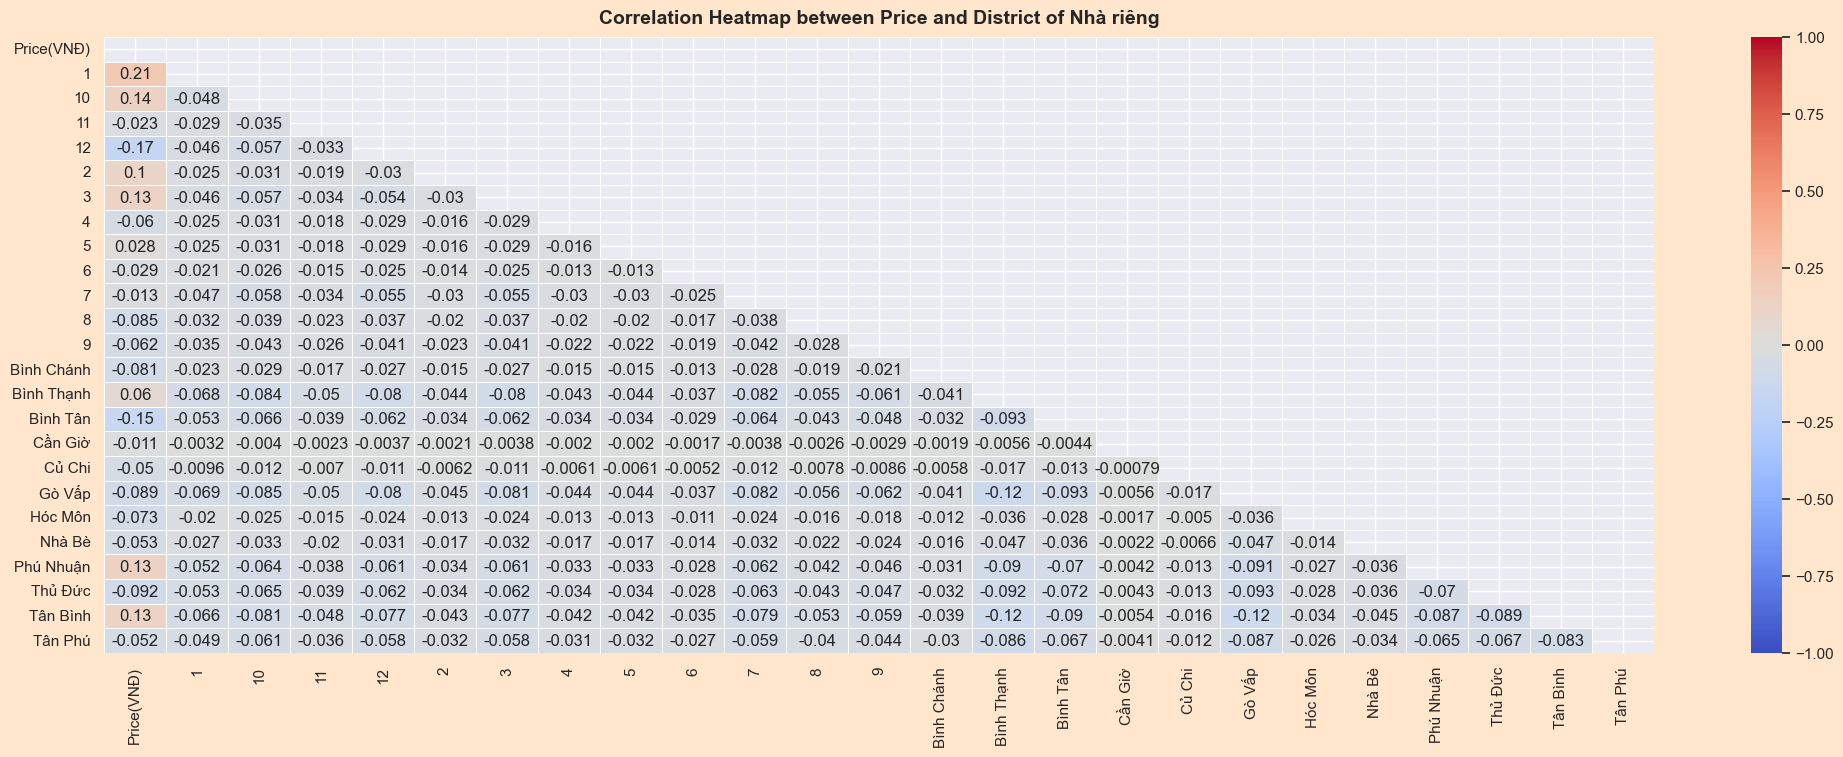

In [205]:
corraltion_price_district('Nhà riêng')

With type `Nhà riêng`, the price have a strong correlation with `District 1`, `District 10`. `District 3`, `Phú Nhuận`, `Tân Bình`. As we have analized in `Question 02`, they are all district that have the overall price higher than others. District that have weak correlation is `District 12`, this is also the district that have cheapest price of `Nhà riêng`

##### **Type Căn hộ chung cư**

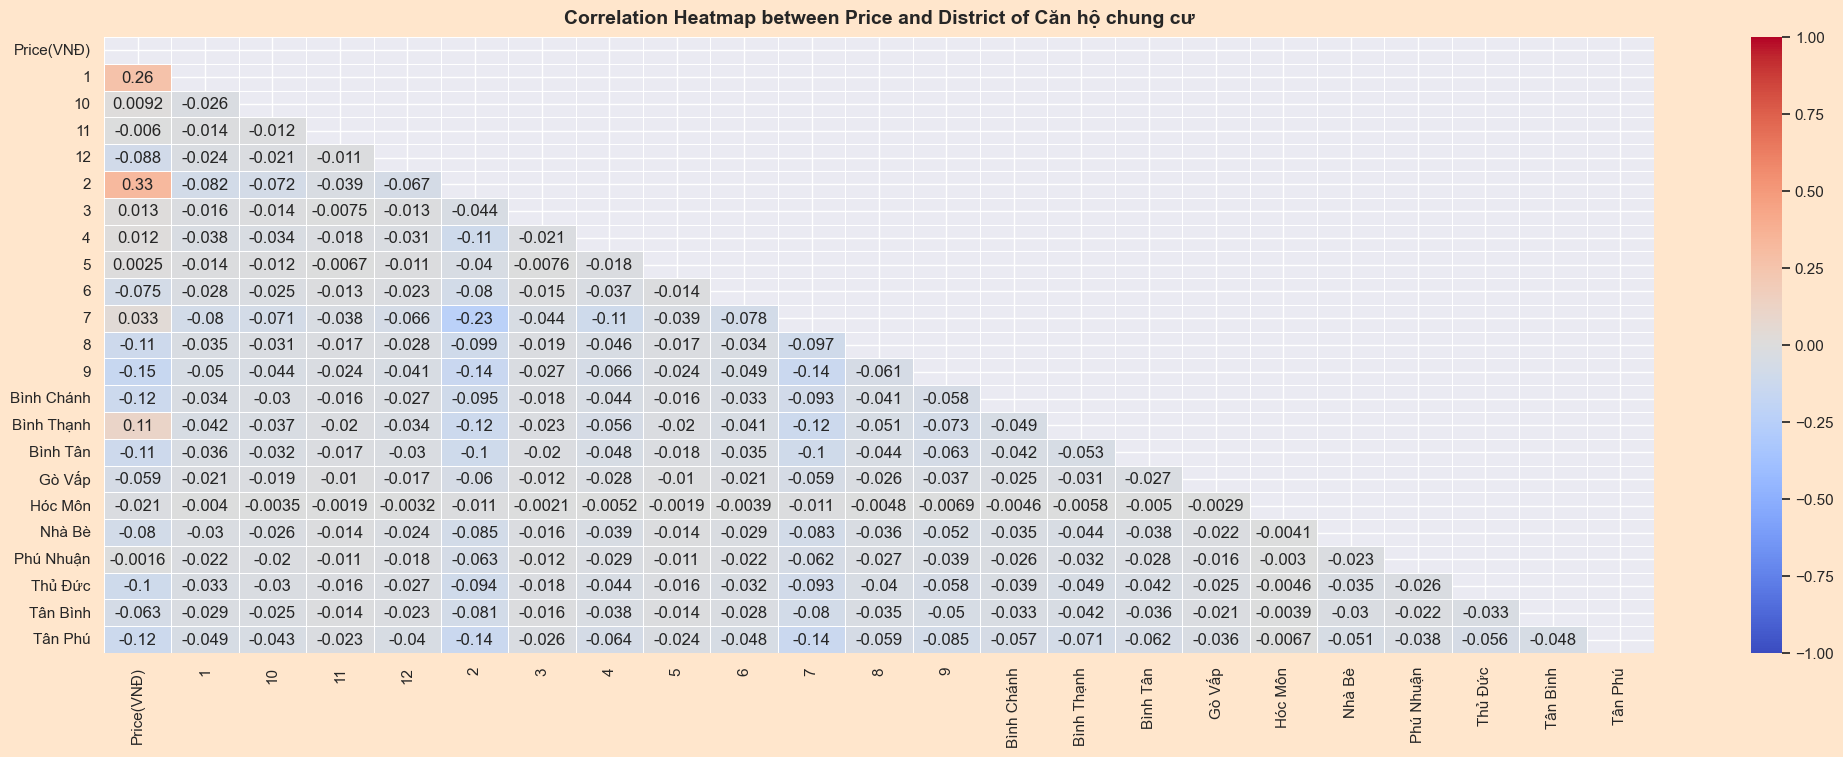

In [206]:
corraltion_price_district('Căn hộ chung cư')

There is a strong correlation between `Price` and `District 1`, `District 2`, `Bình Thạnh`, as we discuss above, they also district that have very high price of `Căn hộ chung cư`.

##### **Type Nhà biệt thự, liền kề**

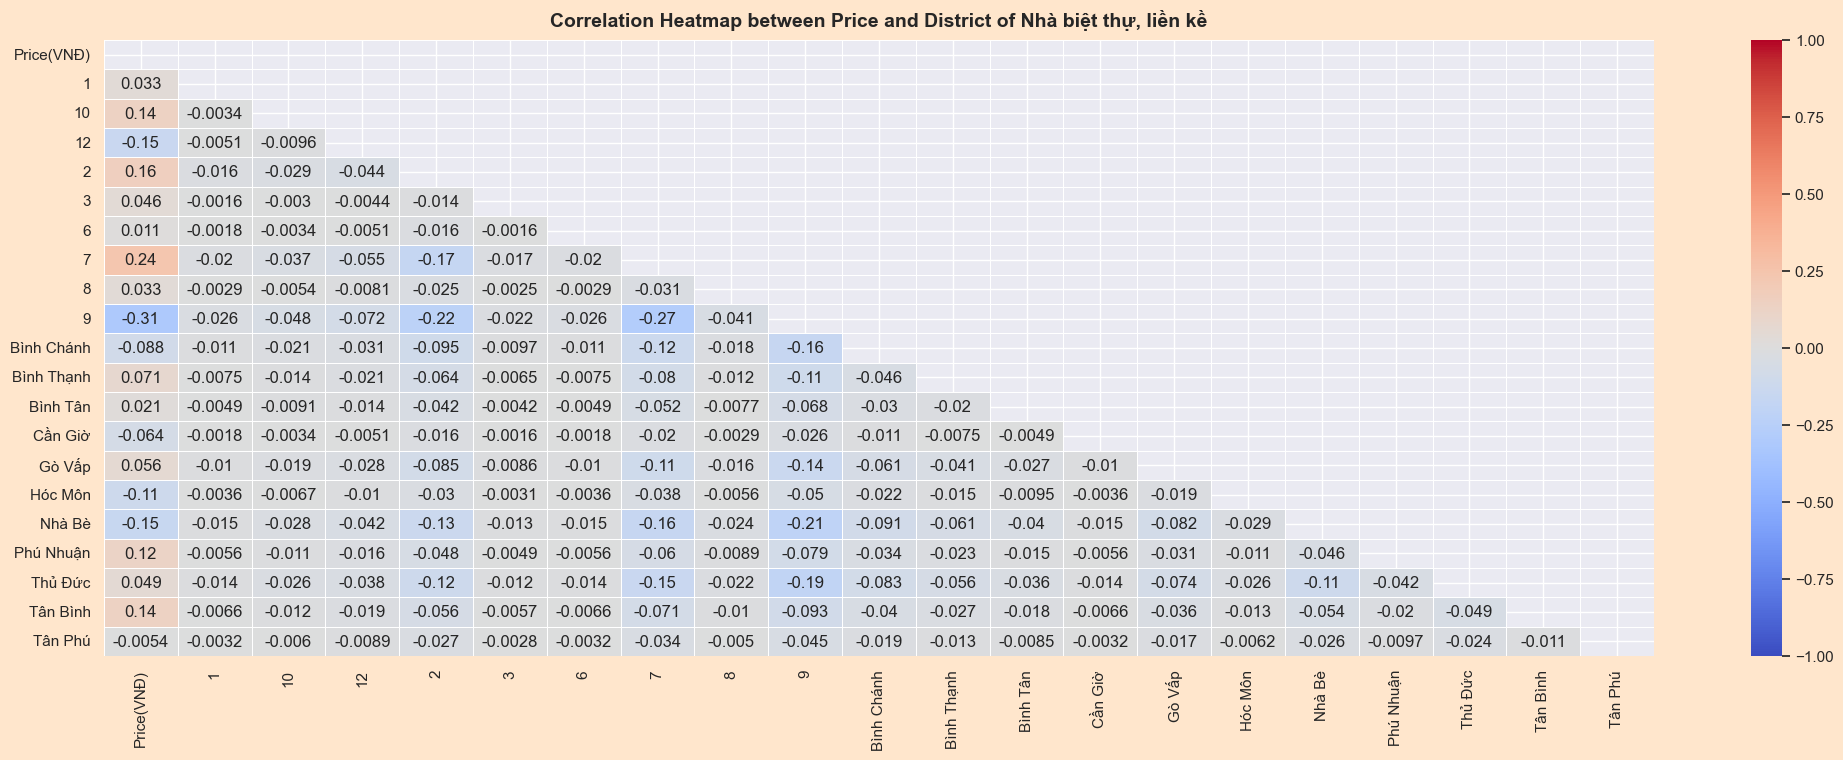

In [207]:
corraltion_price_district('Nhà biệt thự, liền kề')

District that have strong correlation with `Price` are `District 7`, `District 2`. `District 10`, `Tân Bình`

##### **Type Nhà mặt phố**

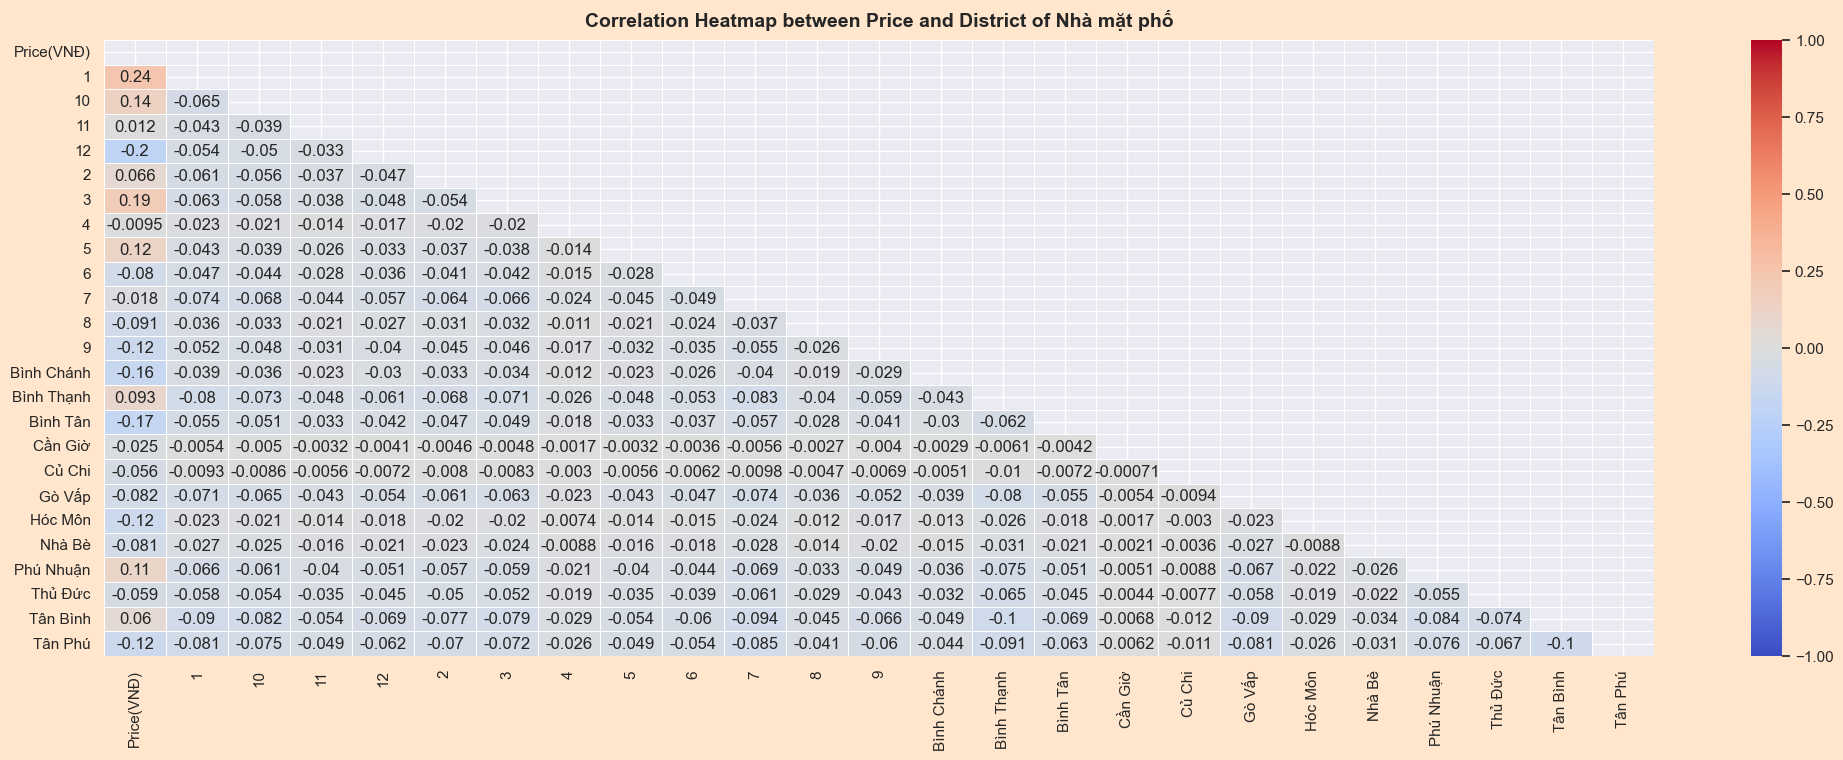

In [208]:
corraltion_price_district('Nhà mặt phố')

With type `Nhà mặt phố`, `Price` have the strongest correlation with `District 1`,  followed by `District 3` and `District 10`

##### **Type Đất bán**

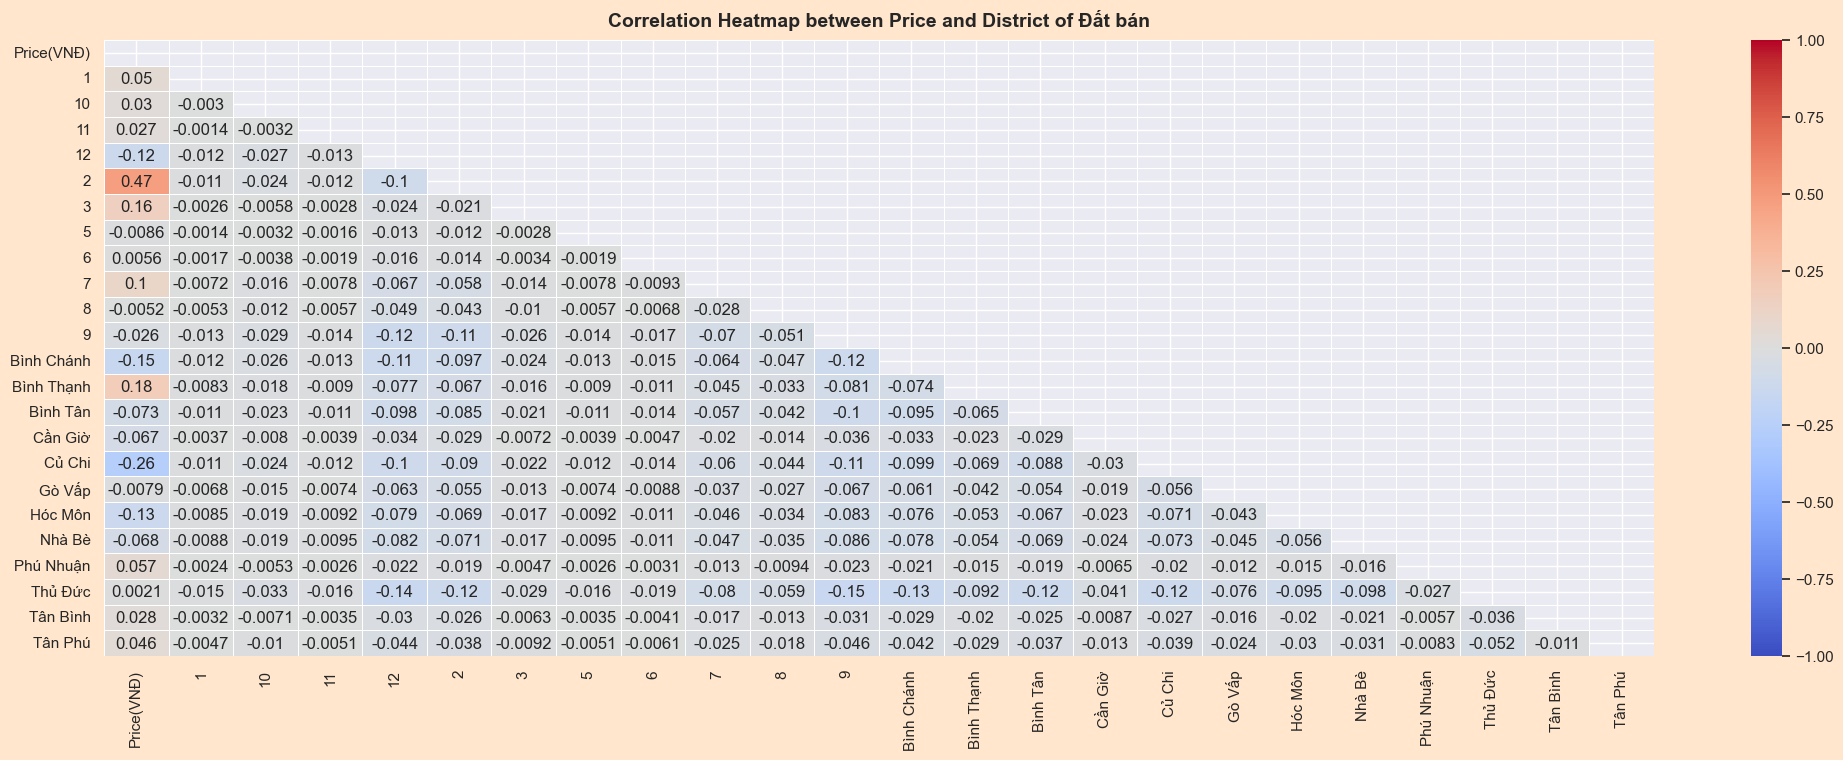

In [209]:
corraltion_price_district('Đất bán')

With `Đất bán`, the notable correlatio here is 0.47 between the `Price` and `District 2`, with the plot `Price distribution of Đất bán by district`, we can easily see that `District 2` also have the overall highest price among districts.

##### **Type Đất nền dự án**

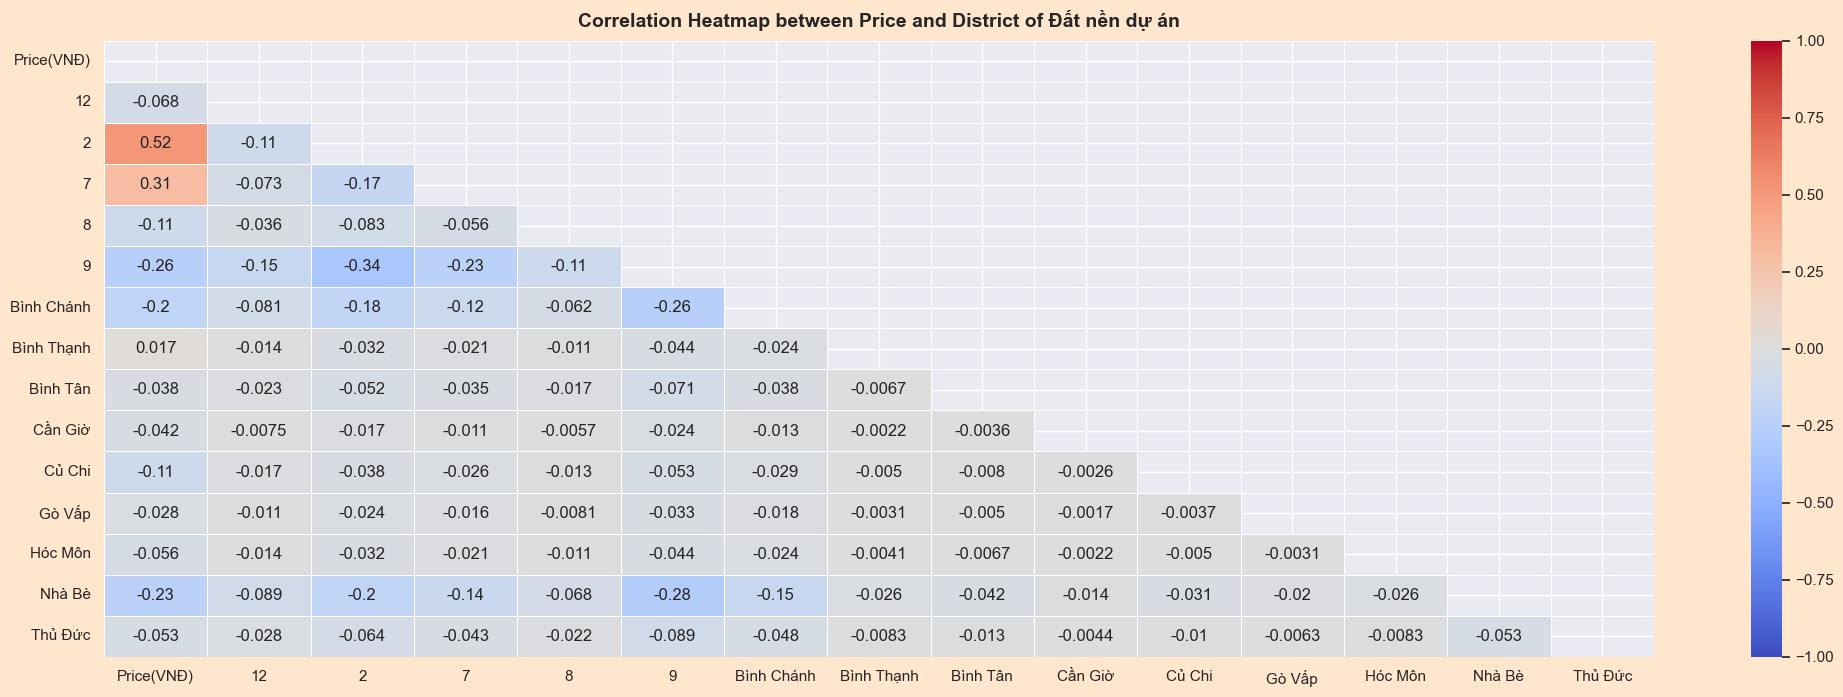

In [210]:
corraltion_price_district('Đất nền dự án')

Like `Đất bán`, `Đất nền dự án` also have a strong correlation between `Price` and `District 2`, followed be `District 7`, all other districts have the negative correaltion with `Price`

**Overall:**
- We can see that for all types of real eastate, there are a good correlation between the `Price` with `Area`, `Bedroom`, `Toilet`, `Floor` for just types that is not `Căn hộ chung cư`. Also, there is a low relationship with `Furniture` and `Legal`, show that these factor not affect so much to the `Price` of a real estate.

- For the `District`, the correlation of `Price` are also very diffrence between each district, for a overview trend, districts that have notable high price tend to have the higher correlation with the `Price`.